In [5]:


# import pandas as pd
import modin.pandas as pd



In [6]:
stocks_df = pd.read_csv("all_stocks_5yr.csv")

print(type(stocks_df))

<class 'modin.pandas.dataframe.DataFrame'>


In [7]:


print(stocks_df.axes)



[RangeIndex(start=0, stop=619040, step=1), Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')]


In [8]:
positive_stocks_df = stocks_df.query("close > open")


print(positive_stocks_df['date'].head(n=10))
print("\nNumber of positive days:", positive_stocks_df.size)
print("\nRatio of positive days to total days:", positive_stocks_df.size/stocks_df.size)

3     2013-02-13
5     2013-02-15
11    2013-02-26
12    2013-02-27
14    2013-03-01
15    2013-03-04
16    2013-03-05
17    2013-03-06
18    2013-03-07
20    2013-03-11
Name: date, dtype: object

Number of positive days: 2232790

Ratio of positive days to total days: 0.5152655724993538


In [9]:
print(stocks_df['date'].head(n=10))

0    2013-02-08
1    2013-02-11
2    2013-02-12
3    2013-02-13
4    2013-02-14
5    2013-02-15
6    2013-02-19
7    2013-02-20
8    2013-02-21
9    2013-02-22
Name: date, dtype: object


In [10]:
stocks_df.set_index('date', inplace=True)
print(stocks_df.axes)

[Index(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13', '2013-02-14',
       '2013-02-15', '2013-02-19', '2013-02-20', '2013-02-21', '2013-02-22',
       ...
       '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30', '2018-01-31',
       '2018-02-01', '2018-02-02', '2018-02-05', '2018-02-06', '2018-02-07'],
      dtype='object', name='date', length=619040), Index(['open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')]


In [11]:


print(stocks_df.T[:])



date   2013-02-08 2013-02-11 2013-02-12 2013-02-13 2013-02-14 2013-02-15  \
open        15.07      14.89      14.45       14.3      14.94      13.93   
high        15.12      15.01      14.51      14.94      14.96      14.61   
low         14.63      14.26       14.1      14.25      13.16      13.93   
close       14.75      14.46      14.27      14.66      13.99       14.5   
volume    8407500    8882000    8126000   10259500   31879900   15628000   
Name          AAL        AAL        AAL        AAL        AAL        AAL   

date   2013-02-19 2013-02-20 2013-02-21 2013-02-22  ... 2018-01-25 2018-01-26  \
open        14.33      14.17      13.62      13.57  ...      78.47      79.49   
high        14.56      14.26      13.95       13.6  ...      79.38      80.13   
low         14.08      13.15       12.9      13.21  ...     78.345      79.38   
close       14.26      13.33      13.37      13.57  ...      79.25      80.09   
volume   11354400   14725200   11922100    6071400  ...    232

In [28]:
# Pandas on Ray
import os
#os.environ["MODIN_CPUS"] = "8"
os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
import modin.pandas as pd
print("Pandas on Ray:")
%time pandas_on_ray = pd.read_csv("large/midyear_population_age_country_code.csv")


Pandas on Ray:
Wall time: 19.5 s


In [11]:
# Pandas
import pandas as old_pd
print("\nPandas:")
%time pandas_native = old_pd.read_csv("large/midyear_population_age_country_code.csv")


Pandas:
Wall time: 1min 2s


In [27]:
# Pandas on Ray
import os
#os.environ["MODIN_CPUS"] = "8"
os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask
import modin.pandas as pd
print("Pandas on Dask:")
%time pandas_on_ray = pd.read_csv("large/midyear_population_age_country_code.csv")


Pandas on Dask:
Wall time: 21.8 s


In [8]:
import dask.dataframe as dd
print("Dask DataFrame speed")
%time df = dd.read_csv("large/midyear_population_age_country_code.csv")

Dask DataFrame speed
Wall time: 100 ms


In [9]:
from dask.distributed import Client
client = Client('192.168.0.12:8786')


OSError: Timed out trying to connect to tcp://192.168.0.12:8786 after 10 s

In [3]:
#from dask.distributed import Client
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
cluster.scale(4)
client = Client(cluster)
#client = Client('192.168.0.12:8786')  # Connect to distributed cluster and override default
#df.x.sum().compute()  # This now runs on the distributed system



d:\anaconda3\lib\site-packages\distributed\node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61383 instead
  http_address["port"], self.http_server.port


In [12]:
import dask.dataframe as dd
%time df = dd.read_csv("large/midyear_population_age_country_code.csv")
#df.x.sum().compute()
#df = dd.read_csv('s3://dask-data/nyc-taxi/2015/*.csv',
#                parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'],
#                storage_options={'anon': True})
#dd = client.persist(dd)
df = client.persist(df)
#progress(df)
client

Wall time: 46.9 ms


Client Scheduler: tcp://127.0.0.1:61386 Dashboard: http://127.0.0.1:61383/status,Cluster Workers: 4 Cores: 8 Memory: 15.81 GiB


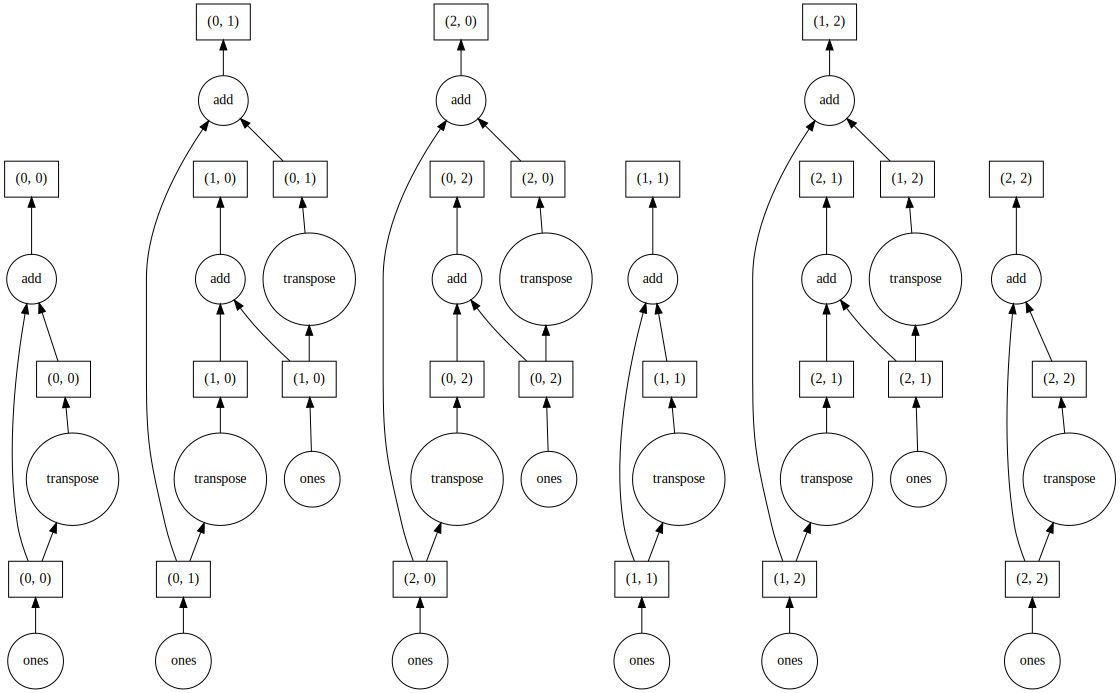

In [52]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))

y = x + x.T

# y.compute()
y.visualize(filename='transpose.svg')